# CSPC 4810-W01 End of Term Project
### Jose Fernando Tellez ID- 100363335
### Sai Naren Kantipundi ID-100369639
### Edward Thjang ID-100369639
### Srinivasa Sachin Suresh Kumar  ID- 100369196

## Context

The Open Access Series of Imaging Studies (OASIS) is a project aimed at making MRI data sets of the brain freely available to the scientific community. The MRI and Alzheimers dataset containes Magnetic Resonance Imaging Comparisons of Demented and Nondemented adults
The base data consists in two main datasets: 

-__oasis_cross-sectional.csv__- Cross sectional collections of 416 subjects aged 18 to 96

-__oasis_longitudinal.csv__- Longitudinal collection of 150 subjects aged 60 to 96 




In [4]:
#Dataset import 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
crossSectional_df=pd.read_csv("oasis_cross-sectional.csv")
Longitudinal_df=pd.read_csv("oasis_longitudinal.csv")


In [5]:
crossSectional_df

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [3]:
Longitudinal_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Proposed transformations 

Cleaning NaN values in both datasets

Combine the two datasets 

Perform in depth exploratory analysis 

Average number of visits for demented Non demented patients

Summarize / Use cross validation tables -Binning Age and getting average parameters per group (eTIV, nWBV, ASF)

Boolean queries combined with hierarchical index

Plot scatter plots /correlations between selected variables 





Data Imputation 

In [5]:
crossSectional_df.fillna(method="ffill", inplace=True)
crossSectional_df.fillna(method="bfill",inplace=True)
crossSectional_df.isna().any()

ID       False
M/F      False
Hand     False
Age      False
Educ     False
SES      False
MMSE     False
CDR      False
eTIV     False
nWBV     False
ASF      False
Delay    False
dtype: bool

In [6]:
crossSectional_df.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,1.0
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,1.0
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1.0
3,OAS1_0004_MR1,M,R,28,4.0,3.0,27.0,0.5,1588,0.803,1.105,1.0
4,OAS1_0005_MR1,M,R,18,4.0,3.0,27.0,0.5,1737,0.848,1.010,1.0
5,OAS1_0006_MR1,F,R,24,4.0,3.0,27.0,0.5,1131,0.862,1.551,1.0
6,OAS1_0007_MR1,M,R,21,4.0,3.0,27.0,0.5,1516,0.830,1.157,1.0
7,OAS1_0009_MR1,F,R,20,4.0,3.0,27.0,0.5,1505,0.843,1.166,1.0
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,1.0
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,1.0


In [7]:
Longitudinal_df.fillna(method="ffill",inplace=True)
Longitudinal_df.isna().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES           False
MMSE          False
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [8]:
Longitudinal_df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


### Average age  for males and females in cross sectional reading


In [9]:
crossSectional_df.loc[:,["M/F","Age"]].groupby(["M/F"]).mean()

,Age
M/F,
F,53.369403
M,48.148810


### Average age for males and feamles in Longitudinal reading 

In [10]:
Longitudinal_df.loc[:,["M/F","Age"]].groupby(["M/F"]).mean()

,Age
M/F,
F,77.262911
M,76.681250


### Average parameter values and number of visits for Demented/NonDemented patients

In [11]:
Longitudinal_df.pivot_table(index=["Group"])

,ASF,Age,CDR,EDUC,MMSE,MR Delay,SES,Visit,eTIV,nWBV
Group,,,,,,,,,,
Converted,1.212405,79.756757,0.256757,15.459459,28.675676,771.810811,1.729730,2.027027,1459.270270,0.723730
Demented,1.196890,76.260274,0.671233,13.671233,24.534247,452.541096,2.719178,1.732877,1485.849315,0.716301
Nondemented,1.191063,77.057895,0.005263,15.142105,29.226316,670.242105,2.394737,1.968421,1495.500000,0.740900


### Binning of Age Variable

First we analyze the distribution of the variable "Age" in order to determine how to appropriately bin it to perform further analysis in cross tabulation




(array([13., 25., 57., 71., 53., 66., 44., 28., 12.,  4.]),
 array([60. , 63.8, 67.6, 71.4, 75.2, 79. , 82.8, 86.6, 90.4, 94.2, 98. ]),
 <BarContainer object of 10 artists>)

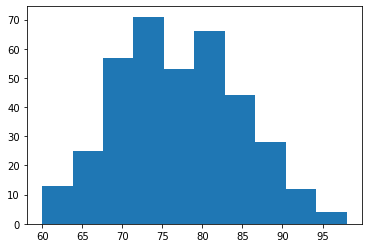

In [12]:
plt.hist(Longitudinal_df["Age"])

Categories for binning 

60<age<70 = Lower bracket 

70<age<80 = Lower middle bracket 

80<age<90 = Upper middle bracket

90<age = Upper bracket 


In [25]:
def Bin_Age(dataset,column="Age"):
    dataset.loc[(dataset[column]>=60)&(dataset[column]<70),"Age_Binned"]="Lower Bracket"
    dataset.loc[(dataset[column]>=70)&(dataset[column]<80),"Age_Binned"]="Lower middle Bracket"
    dataset.loc[(dataset[column]>=80)&(dataset[column]<90),"Age_Binned"]="Upper middle Bracket"
    dataset.loc[(dataset[column]>=90),"Age_Binned"]="Upper middle Bracket"

In [26]:
Bin_Age(Longitudinal_df)
Longitudinal_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Age_Binned
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Upper middle Bracket
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Upper middle Bracket
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,Lower middle Bracket
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,Lower middle Bracket
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,Upper middle Bracket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,Upper middle Bracket
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,Upper middle Bracket
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,Lower Bracket
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,Lower Bracket


Check if there are missing values in the newly created column

In [28]:
Longitudinal_df["Age_Binned"].isna().any()

False

Pivot table for the effects of age and group in the MR scan measurements

In [30]:
Longitudinal_df.pivot_table(index=["Group","Age_Binned"])

ASF        Age       CDR       EDUC  \
Group       Age_Binned                                                       
Converted   Lower Bracket         1.278600  67.200000  0.100000  14.000000   
            Lower middle Bracket  1.212636  75.000000  0.272727  15.636364   
            Upper middle Bracket  1.196524  85.238095  0.285714  15.714286   
Demented    Lower Bracket         1.144920  66.600000  0.680000  14.600000   
            Lower middle Bracket  1.206716  74.486486  0.702703  13.864865   
            Upper middle Bracket  1.209064  84.191489  0.617021  12.872340   
Nondemented Lower Bracket         1.252771  65.514286  0.000000  15.000000   
            Lower middle Bracket  1.183712  74.550000  0.000000  15.562500   
            Upper middle Bracket  1.170107  85.120000  0.013333  14.760000   

                                       MMSE    MR Delay       SES     Visit  \
Group       Age_Binned                                                        
Converted   Lower Bracket         29.000000  135.800000  2.400000  1.200000   
            Lower middle Bracket  28.727273  859.545455  1.636364  1.818182   
            Upper middle Bracket  28.571429  877.285714  1.619048  2.333333   
Demented    Lower Bracket         23.000000  388.840000  2.280000  1.840000   
            Lower middle Bracket  24.905405  369.405405  2.756757  1.621622   
            Upper middle Bracket  24.765957  617.319149  2.893617  1.851064   
Nondemented Lower Bracket         29.342857  405.371429  2.428571  1.571429   
            Lower middle Bracket  29.250000  698.775000  2.375000  1.987500   
            Upper middle Bracket  29.146667  763.413333  2.400000  2.133333   

                                         eTIV      nWBV  
Group       Age_Binned                                   
Converted   Lower Bracket         1376.200000  0.771600  
            Lower middle Bracket  1463.727273  0.745000  
            Upper middle Bracket  1476.714286  0.701190  
Demented    Lower Bracket         1549.400000  0.731160  
            Lower middle Bracket  1476.770270  0.722392  
            Upper middle Bracket  1466.340426  0.698809  
Nondemented Lower Bracket         1412.114286  0.781571  
            Lower middle Bracket  1502.487500  0.742725  
            Upper middle Bracket  1526.960000  0.719973

## Additional Dataset (Alzheimer_s_Disease_and_Healthy_Aging_Data)

In [5]:
#Dataswet Import
gg_df=pd.read_csv("Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")

### Identifying Relevant Health issue classes

In [64]:
gg_df["Class"].unique()

array(['Mental Health', 'Overall Health', 'Screenings and Vaccines',
       'Nutrition/Physical Activity/Obesity', 'Caregiving',
       'Smoking and Alcohol Use', 'Cognitive Decline'], dtype=object)

### Filtering Dataset by classes and percentage values [2 classes selected]

In [65]:
gg_df1=gg_df[gg_df["Class"]=="Cognitive Decline"]
gg_df1=gg_df1.loc[gg_df1["Data_Value_Type"]=="Percentage"]


In [6]:
gg_df2=gg_df.loc[gg_df["Class"]=="Mental Health"]
gg_df2=gg_df2.loc[gg_df2["Data_Value_Type"]=="Percentage"]


### Identifying relevant health topics under each class

In [67]:
gg_df1["Topic"].unique()

array(['Need assistance with day-to-day activities because of subjective cognitive decline or memory loss',
       'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
       'Talked with health care professional about subjective cognitive decline or memory loss',
       'Subjective cognitive decline or memory loss among older adults'],
      dtype=object)

In [7]:
gg_df2["Topic"].unique()

array(['Lifetime diagnosis of depression', 'Frequent mental distress'],
      dtype=object)

### Assessing percentage distribution/mean by Topic

In [69]:
gg_df1.groupby(["Topic"]).mean()["Data_Value"]

Topic
Functional difficulties associated with subjective cognitive decline or memory loss among older adults    38.733781
Need assistance with day-to-day activities because of subjective cognitive decline or memory loss         33.225238
Subjective cognitive decline or memory loss among older adults                                            11.702755
Talked with health care professional about subjective cognitive decline or memory loss                    44.687573
Name: Data_Value, dtype: float64

(array([ 891., 2322., 1506., 2252., 2165., 1005.,  239.,   78.,   30.,
           9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

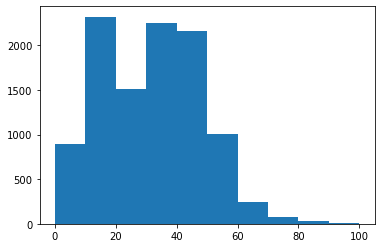

In [73]:
plt.hist(gg_df1["Data_Value"])

In [71]:
gg_df2.groupby(["Topic"]).mean()["Data_Value"]

Topic
Frequent mental distress            10.768843
Lifetime diagnosis of depression    18.193050
Name: Data_Value, dtype: float64

(array([5.290e+02, 3.185e+03, 2.931e+03, 1.631e+03, 5.840e+02, 1.850e+02,
        4.000e+01, 1.200e+01, 2.000e+00, 3.000e+00]),
 array([ 0.9 ,  6.54, 12.18, 17.82, 23.46, 29.1 , 34.74, 40.38, 46.02,
        51.66, 57.3 ]),
 <a list of 10 Patch objects>)

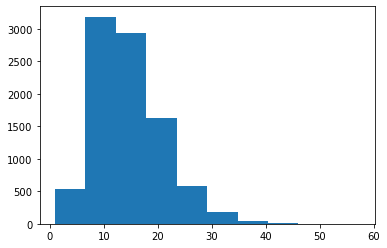

In [74]:
plt.hist(gg_df2["Data_Value"]) 